<a href="https://colab.research.google.com/github/jumacaq/Robot_Trading_BTC-USD/blob/main/Robot_Trading_by_JCQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ROBOT TRADING BTC-USD**

*autor: Juan Campos Quintana*

El proyecto consiste en crear un **Robot Trading en Python** que tome decisiones de compra-venta de la principal criptomoneda del mercado, basadas en datos en tiempo real usando técnicas para extracción de datos desde una API, Web scraping, tratamiento y manipulación de datos con librerías Numpy y Pandas, y creación de gráficos con Matplotlib.

El proyecto consta de 6 etapas que se muestran a continuación.

##1- Configuración de ambiente

In [3]:
#Versión de python
!python -V

Python 3.10.12


In [4]:
#Importamos las librerías necesarias para el proyecto
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import yfinance as yf



In [5]:
!pip show Pandas | grep 'Name\|Version'

Name: pandas
Version: 1.5.3


In [6]:
!pip show Numpy | grep 'Name\|Version'

Name: numpy
Version: 1.23.5


In [7]:
!pip show Matplotlib | grep 'Name\|Version'

Name: matplotlib
Version: 3.7.1


In [8]:
!pip install yfinance

In [9]:
#Definimos las variables globales
global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision

##2- Obtención de datos

###2.1- Precio histórico del Bitcoin

Lo obtendremos extrayendo el precio histórico del Bitcoin desde la API de Yahoo Finance utilizando la librería `yfinance` de Python, esta variable la guardaremos en la función `importar_base_bitcoin()`

In [10]:
#Creamos la función importar_base_bitcoin() que retornará el DataFrame con el precio histórico del Bitcoin
def importar_base_bitcoin():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision
  data = yf.download("BTC-USD", period="7d",interval="5m")
  df_bitcoin = pd.DataFrame(data)
  return df_bitcoin

In [11]:
importar_base_bitcoin()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-10-26 00:00:00+00:00,34504.289062,34509.437500,34474.312500,34509.437500,34509.437500,0
2023-10-26 00:05:00+00:00,34521.175781,34521.175781,34474.617188,34505.679688,34505.679688,0
2023-10-26 00:10:00+00:00,34496.804688,34527.507812,34484.953125,34527.507812,34527.507812,317440
2023-10-26 00:15:00+00:00,34533.218750,34543.382812,34524.519531,34543.382812,34543.382812,0
2023-10-26 00:20:00+00:00,34548.535156,34554.820312,34537.343750,34554.820312,34554.820312,0
...,...,...,...,...,...,...
2023-11-01 21:15:00+00:00,35323.398438,35411.652344,35323.398438,35387.015625,35387.015625,237277184
2023-11-01 21:20:00+00:00,35369.101562,35389.566406,35322.093750,35348.906250,35348.906250,66127872
2023-11-01 21:25:00+00:00,35337.890625,35351.648438,35284.269531,35351.648438,35351.648438,52721664


###2.2- Indicadores de tendencia

Utilizaremos la librería `BeautifulSoup` para hacer Web Scraping de la página `https://coinmarketcap.com/` para extraer el precio actual del Bitcoin BTC en dólares USD y la variación de su precio en la última hora, ambas variables serán guardadas en la función `extraer_tendencias()`


In [12]:
#Importamos la librería BeautifulSoup para ejecutar el Web Scraping
from bs4 import BeautifulSoup
import requests

In [13]:
#Creamos la función extraer_tendencias() que retornará el precio actualizado del Bitcoin y la tendencia de dicho precio
def extraer_tendencias():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision
  headers = {'User-Agent':"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36"}
  url = "https://coinmarketcap.com/"
  respuesta = requests.get(url,headers=headers)
  s = BeautifulSoup(respuesta.content,features="lxml")
  #Código para identificar las etiquetas html de donde extraeremos la variable precio y variación de tendencia
  label_precio = s.find('div',{'class':['sc-a0353bbc-0 gDrtaY rise','sc-a0353bbc-0 gDrtaY','sc-a0353bbc-0 gDrtaY fall']})
  label_variacion = s.find('span', {'class': ['sc-d55c02b-0 gUnzUB','sc-d55c02b-0 iwhBxy']})
  #Extraemos el texto de las etiquetas
  texto_precio = label_precio.find('span')
  texto_variacion = label_variacion.find('span')
  #Con el método .text extraemos el contenido del precio de la etiqueta 'span',luego cambiamos a tipo float
  precio = texto_precio.text.strip()
  precio_actual = float(precio.replace("$","").replace(",",""))
  #Creamos la variable variacion son el elemento 'class' de la etiqueta 'span'
  variacion = texto_variacion.get('class')
  variacion = str(variacion)#cambiamos el contenido de la variable 'variación' al tipo string
  #Creamos condicionales para determinar la tendencia usando la etiqueta 'icon-Caret'
  if variacion == "['icon-Caret-up']":
    tendencia = "alta"
  elif variacion == "['icon-Caret-down']":
    tendencia = "baja"
  else:
    tendencia = "esperar"
  return precio_actual,tendencia



In [14]:
extraer_tendencias()
print('Precio Bitcoin: ', precio_actual)
print('Tendencia: ', tendencia)


Precio Bitcoin:  35296.15
Tendencia:  alta


##3- Limpieza de datos

Crearemos una copia de la base `df_bitcoin` para realizar la limpieza de datos en esta nueva base `df_bitcoin_limpio`, sin modificar la base original. Luego eliminaremos duplicados, valores nulos y outliers para construir la función `limpieza_datos()`


In [15]:
#Creamos la copia del DataFrame
df_bitcoin_limpio = df_bitcoin.copy()
df_bitcoin_limpio.head()


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-10-26 00:00:00+00:00,34504.289062,34509.437500,34474.312500,34509.437500,34509.437500,0
2023-10-26 00:05:00+00:00,34521.175781,34521.175781,34474.617188,34505.679688,34505.679688,0
2023-10-26 00:10:00+00:00,34496.804688,34527.507812,34484.953125,34527.507812,34527.507812,317440
2023-10-26 00:15:00+00:00,34533.218750,34543.382812,34524.519531,34543.382812,34543.382812,0
2023-10-26 00:20:00+00:00,34548.535156,34554.820312,34537.343750,34554.820312,34554.820312,0


In [16]:
df_bitcoin_limpio.info

<bound method DataFrame.info of                                    Open          High           Low  \
Datetime                                                              
2023-10-26 00:00:00+00:00  34504.289062  34509.437500  34474.312500   
2023-10-26 00:05:00+00:00  34521.175781  34521.175781  34474.617188   
2023-10-26 00:10:00+00:00  34496.804688  34527.507812  34484.953125   
2023-10-26 00:15:00+00:00  34533.218750  34543.382812  34524.519531   
2023-10-26 00:20:00+00:00  34548.535156  34554.820312  34537.343750   
...                                 ...           ...           ...   
2023-11-01 21:15:00+00:00  35323.398438  35411.652344  35323.398438   
2023-11-01 21:20:00+00:00  35369.101562  35389.566406  35322.093750   
2023-11-01 21:25:00+00:00  35337.890625  35351.648438  35284.269531   
2023-11-01 21:30:00+00:00  35350.406250  35350.406250  35302.824219   
2023-11-01 21:35:00+00:00  35296.148438  35296.148438  35284.285156   

                                  Close     

Es importante entender el contenido del DataFrame:

**Datetime**: Es el índice del dataframe, y contiene la fecha y hora del intervalo seleccionado, no puede estar duplicado.

**Open**: Contiene el precio del Bitcoin al inicio del intervalo.

**High**: Contiene el precio más alto del Bitcoin durante el intervalo.

**Low**: Contiene el precio más bajo del Bitcoin durante el intervalo.

**Close**: Contiene el precio del Bitcoin al final del intervalo.

**Volume**: Contiene el total de transacciones hechas durante el intervalo.

Para la limpieza utilizaremos los atributos `Datetime`, `Close`  y `Volume`

In [17]:
#Verificamos que no haya duplicados en el índice del DataFrame 'df_bitcoin_limpio'
df_bitcoin_limpio = df_bitcoin_limpio[~df_bitcoin_limpio.index.duplicated(keep='first')]#Este código retornará los elementos que no estan duplicados
print(df_bitcoin.shape[0], df_bitcoin_limpio.shape[0])#Comparamos con el DataFrame original y verificamos que no existian filas duplicadas

1984 1984


In [18]:
#Buscamos valores nulos en la columna 'Close'
df_bitcoin_limpio[df_bitcoin_limpio.Close.isnull()].shape[0] # El número de filas con valores nulos es 0

0

In [19]:
#Verificar que las filas de la columna 'Volumen' sean mayor a 0, caso contrário, eliminar.
df_bitcoin_limpio = df_bitcoin_limpio[df_bitcoin_limpio.Volume > 0] #Eliminamos los valores = 0 en la columna 'Volume'
df_bitcoin_limpio.shape[0]

896

<Axes: >

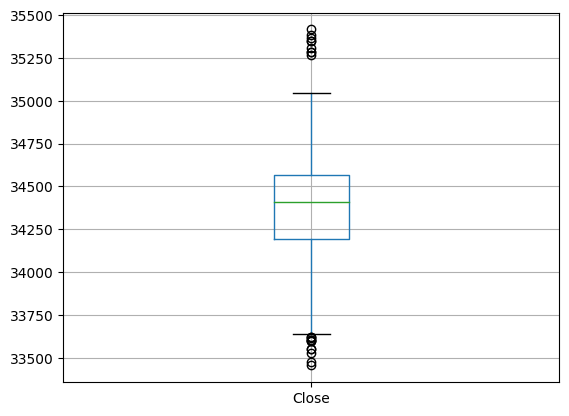

In [20]:
#identificar y eliminar los outliers en la columna 'Close', utiliza un gráfico de boxplot para identificarlos.
df_bitcoin_limpio.boxplot(['Close'])

<Axes: >

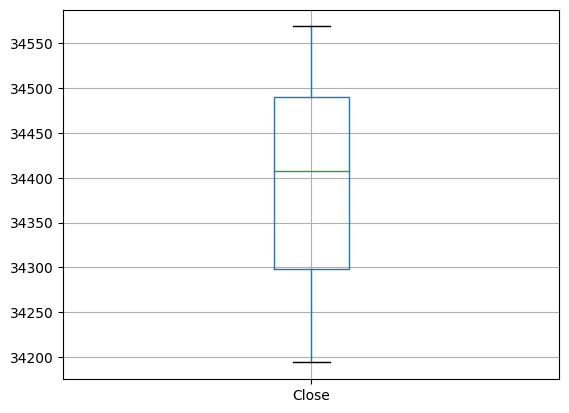

In [21]:
#Filtra o selecciona únicamente los registros cuyo precio(Close) se encuentren entre el 1er cuartil(Q1) y el 3er cuartil(Q3) del boxplot
valor = df_bitcoin_limpio['Close']#Para eliminar los outliers, vamos a crear nuestros cuartiles
Q1 = valor.quantile(.25) #quartil 1 = 25% de los datos
Q3 = valor.quantile(.75) #quartil 3 = 75% de los datos
seleccion = ((valor >= Q1) & (valor <= Q3))#Con esta seleccion excluimos los outliers
df_bitcoin_limpio = df_bitcoin_limpio[seleccion]
df_bitcoin_limpio.boxplot(['Close'])#Creamos otro gráfico boxplot, esta vez sin outliers

In [22]:
#Finalmente, creamos la función limpieza_datos que retornará el precio promedio de la columna'Close' y estará guardada en la variable media_bitcoin.
def limpieza_datos():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision
  df_bitcoin_limpio = df_bitcoin.copy()
  df_bitcoin_limpio = df_bitcoin_limpio[~df_bitcoin_limpio.index.duplicated(keep='first')]
  df_bitcoin_limpio[df_bitcoin_limpio.Close.isnull()]
  df_bitcoin_limpio = df_bitcoin_limpio[df_bitcoin_limpio.Volume > 0]
  valor = df_bitcoin_limpio['Close']
  Q1 = valor.quantile(.25)
  Q3 = valor.quantile(.75)
  seleccion = (valor >= Q1) & (valor <= Q3)
  df_bitcoin_limpio = df_bitcoin_limpio[seleccion]
  media_bitcoin = df_bitcoin_limpio['Close'].mean().round(2)
  return media_bitcoin


In [23]:
limpieza_datos()

34394.53

##4- Tomar decisiones

Crearemos una función `tomar_decisiones()` dentro de ella construiremos el algoritmo que retornará la variable `algoritmo_decision`:

In [24]:
#Creamos la función tomar_decisiones() con las condicionales
def tomar_decisiones():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision
  if(precio_actual >= media_bitcoin) & (tendencia == 'baja'):
    algoritmo_decision = 'Vender'
  elif(precio_actual < media_bitcoin) & (tendencia == 'alta'):
    algoritmo_decision = 'Comprar'
  else:
    algoritmo_decision = 'Esperar'
  return algoritmo_decision


In [25]:
tomar_decisiones()
print('Decisión: ', algoritmo_decision)

Decisión:  Esperar


##5- Visualización

Creamos una función `visualizacion()` dentro de ella, usando la librería `matplotlib` vamos a crear un gráfico con los siguientes pasos:

In [26]:
#Adicionamos una nueva columna (Promedio) al dataframe original 'df_bitcoin' en la cual almacenamos el valor de nuestra variable media_bitcoin.
df_bitcoin['Promedio'] = media_bitcoin
df_bitcoin.head()


,Open,High,Low,Close,Adj Close,Volume,Promedio
Datetime,,,,,,,
2023-10-26 00:00:00+00:00,34504.289062,34509.437500,34474.312500,34509.437500,34509.437500,0,34394.53
2023-10-26 00:05:00+00:00,34521.175781,34521.175781,34474.617188,34505.679688,34505.679688,0,34394.53
2023-10-26 00:10:00+00:00,34496.804688,34527.507812,34484.953125,34527.507812,34527.507812,317440,34394.53
2023-10-26 00:15:00+00:00,34533.218750,34543.382812,34524.519531,34543.382812,34543.382812,0,34394.53
2023-10-26 00:20:00+00:00,34548.535156,34554.820312,34537.343750,34554.820312,34554.820312,0,34394.53


In [27]:
#Creamos la función visualizacion()
def visualizacion():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision
  df_bitcoin['Promedio'] = media_bitcoin
  #Algoritmo para dar color al texto de la variable 'algoritmo_decision'
  if algoritmo_decision == 'Vender':
      color_decision = 'green'
  elif algoritmo_decision =='Comprar':
      color_decision = 'red'
  else:
      color_decision = 'brown'
  #Configuramos el tamaño del gráfico en una proporción de 16x5,damos color al fondo del gráfico
  plt.rc('figure',figsize = (16,5),facecolor='#E8DEE1')
  #Agregamos un título al gráfico y a los ejes x,y
  plt.title('GRAFICO PARA DECIDIR COMPRA-VENTA DE BITCOIN',fontsize=20,weight = 'bold')
  plt.xlabel('Fecha')
  plt.ylabel('Precio Actual en USD')
  #Con el método plot()dibujamos una línea en el gráfico, con los datos del índice y la columna 'Close' de la base
  #df_bitcoin,nombramos etiqueta,damos estilo y color a dicha línea
  plt.plot(df_bitcoin.index, df_bitcoin['Close'], label='Precio de Cierre', linestyle='-', color='Blue')
  #Con el método plot()dibujamos una línea en el gráfico, con los datos del índice y la columna 'Promedio' de la base
  #df_bitcoin,nombramos etiqueta y damos estilo y color
  plt.plot(df_bitcoin.index, df_bitcoin['Promedio'], label='Precio Promedio', linestyle='dashdot', color='Red')
  #Con el método annotate()muestra un mensaje dentro del gráfico con la decisión calculada del algoritmo_decision,
  #damos al texto tamaño, color y resaltamos
  plt.annotate(f'Decision: {algoritmo_decision}',xy=(df_bitcoin.index[-1], 33600), fontsize=12,
               color=color_decision,weight = 'bold')
  #Agregamos leyendas al gráfico
  plt.legend()
  #Agregamos cuadrículas al gráfico, para observar mejor las intersecciones de los ejes
  plt.grid()
  #Finalmente, usando el método show() mostramos en pantalla el gráfico que acabamos de configurar.
  plt.show()


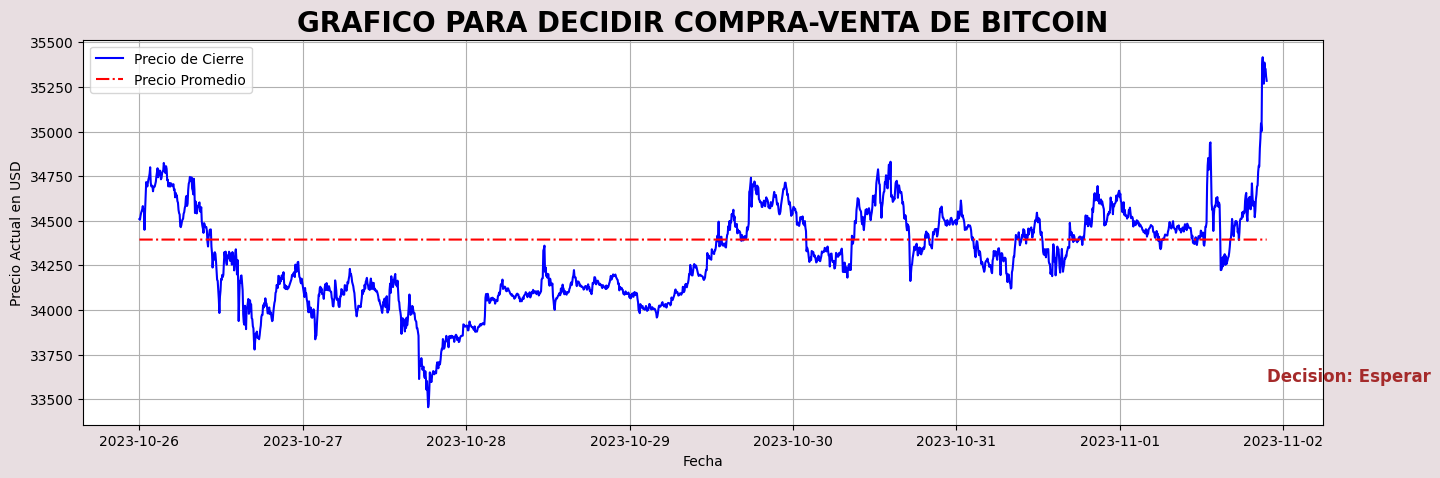

In [28]:
visualizacion()

##6- Automatización

El trabajo termina cuando la solución al problema está automatizada, esto permite soluciones automáticas para nuevos lotes de información.

Importaremos el método `clear_output()` y la biblioteca `time ` para construir un loop infinito que ejecute permanentemente y en intervalos de 5 minutos, las funciones que hemos construído en los pasos 2 al 5 de nuestro proyecto.


[*********************100%%**********************]  1 of 1 completed


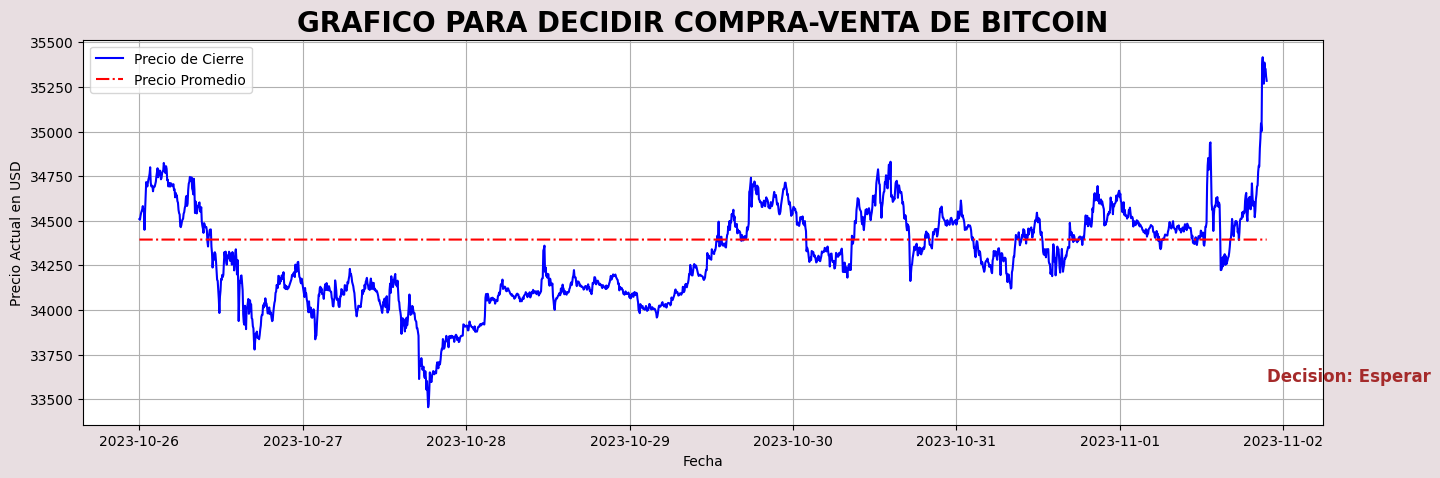

In [ ]:
#Importamos el método 'clear_output()', este método nos permite borrar los resultados de la pantalla antes de imprimir
#un nuevo gráfico, y así evitar tener más de un gráfico en la pantalla
from IPython.display import clear_output
#Importamos la biblioteca ‘time’, usamos su método time.sleep(300) para interrumpir la ejecución del código
#cada 300 segundos o 5 minutos.
import time
#Finalmente creamos un loop infinito:
while(True):
  clear_output()
  importar_base_bitcoin()
  extraer_tendencias()
  limpieza_datos()
  tomar_decisiones()
  visualizacion()
  time.sleep(300)